Welcome to the root introduction for new students! Please have a look into the ROOT user's guide for all details:
https://root.cern.ch/guides/users-guide

But of course you can not read all of it or go through all of the examples! However, I will point you to some exercises which I think could be useful for you.

Let's start with Hello World...

In [1]:
cout << "Hello World!"<<endl;
int year = 2017;
cout << "Happy new " << year << "!" <<endl;

Hello World!
Happy new 2017!


OK, that was easy. 
Something you will come across a lot is gaussian distributions. 
Now let's generate a Gaussian distribution and plot it.
References: 

1) https://root.cern.ch/root/htmldoc/guides/users-guide/ROOTUsersGuide.html#creating-histograms 

2) https://root.cern.ch/root/htmldoc/guides/users-guide/ROOTUsersGuide.html#grandom

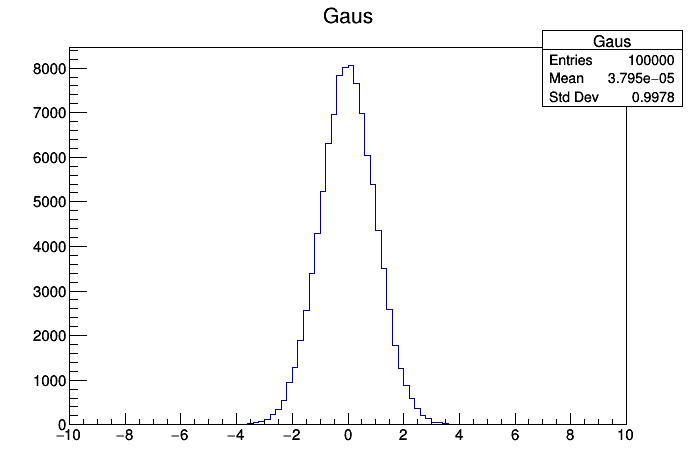

In [2]:
gRandom = new TRandom3();
TH1D *hGaus = new TH1D("Gaus","Gaus",100,-10,10);
for (int iEntry = 0; iEntry < 100000; iEntry++) {
    Double_t value = gRandom->Gaus();
    hGaus->Fill(value);
}
TCanvas *can = new TCanvas();
hGaus->Draw();
can->Draw();

Now it is time for you to generate a gaussian distribution yourself - this time with a mean of 2 and a width of 3.


Now go through the following tasks and make sure you understand them.

Fit the histogram you just generated with a Gaussian.

For documentation see https://root.cern.ch/root/htmldoc/guides/users-guide/ROOTUsersGuide.html#fitting-histograms

Now generate a uniform distribution.

See https://root.cern.ch/root/htmldoc/guides/users-guide/ROOTUsersGuide.html#grandom
    
Plot a the uniform and the original (centered at 0) gaussian distribution in the same histogram.

Plot them in such a way that the statistical uncertainties are shown. Make the markers of the uniform distribution red and the markers of the gaussian distribution blue.

Change the bin size of the histogram in such a way that the statistical uncertaintiea become smaller.

Make a new histogram which is a sum of the uniform and gaussian distribution. Plot it.

Reference: https://root.cern.ch/root/htmldoc/guides/users-guide/ROOTUsersGuide.html#histograms

Make and plot a 2D histogram with a 2D gaussian distribution, where x and y are uncorrelated. What is the difference when you use the same random seed compared to different ones?

Make and plot a 2D histogram where x and y are correlated with some correlation coefficient.

Name the x-axis "Height (cm)" and the y-axis "Weight (grams)". Plot again.

Draw the 2D histogram using the "Surf" option. 

Draw a projection of the 2D histogram on the x-axis. Make a projection on the y-axis.

Make a new histogram with an exponential distribution with tau = 2. Display the statistical uncertainties in each bin.

Plot it with the y-axis on logscale. 

Fit an exponential to the distribution. Do you get back the tau you put in?

Label the x-axis "Life-time (ns)".


Simple hit-or-miss generator

Read for example section 2.3 here: http://www.physik.uzh.ch/~andreasp/mc/mchowto.pdf .



Something about vectors...

Something about browsers...

Something about trees...

Consider the following generator:

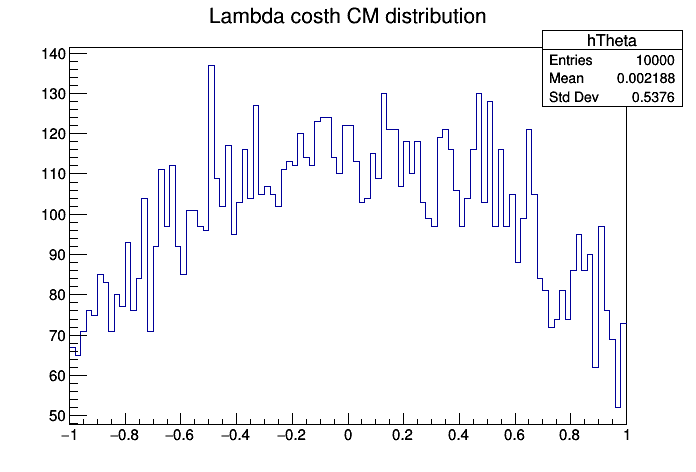

In [4]:
Int_t nevt=10000, nbin=100, i=0, j=0;

  TH1D *hTheta = new TH1D("hTheta","Lambda costh CM distribution", nbin, -1.0, 1.0);

  Double_t randnum1[10000];  //random number array
  Double_t randnum2[10000];  //random number array
  Double_t mlam=1.115683; //hyperon mass
  Double_t cms=2.396;  //centre of mass energy
  Double_t r=2; // ratio between G_E and G_M
  Double_t tau=cms*cms/(4.*mlam*mlam); //phase space factor
  Double_t costh=0.; //initializing variables
  gRandom= new TRandom3(0);

  gRandom->RndmArray(10000, randnum1);  //generate random numbers uniformly between 0 and 1
  gRandom->RndmArray(10000, randnum2);  //generate random numbers uniformly between 0 and 1
  //Now go through all random numbers one by one
  while(i<nevt)
    {
      costh=-1.+2.*randnum1[j]; //the random numbers interval is shifted to between -1 and 1
      Double_t dsdcosth=1+costh*costh+4*r*r*mlam*mlam/(cms*cms)*(1-costh*costh);   //calculating the angular distribution factor
      Double_t upperlim=2.+4*r*r*mlam*mlam/(cms*cms);  //calculating the upper limit

      if(randnum2[j]<dsdcosth/upperlim)   //hit-or-miss criterion
	{

	  hTheta->Fill(costh);  //fill histogram
	  i=i+1;
	}

      j=j+1;
    }

TCanvas *can1 = new TCanvas();
hTheta->Draw();   //Draw histogram
can1->Draw();

Fit a 2nd degree polynomial to the distribution, describing the angular distribution in terms of the ratio of the electromagnetic from factors.
    
What value of R can you deduce from the fit? What is the uncertainty?

Using the code above as a basis, you can calculate R using the Method of Moments (Reference: ask your supervisor for a note). Calculate the uncertainty in R.

Is the output R the same as the R you put in? If not, is it within the uncertainty?

If you rerun the program, do you then get the same value of the output R?
    
What is the uncertainty of R for 1000 events? 500? 200? 100? If you run the program a couple of times, what is the difference in the value of R?
    
What is the uncertainty of R if you have 1300 events and if R = 0.75?
    
Make the same exercise for Sigma0 and Sigma+ .
    